<a href="https://colab.research.google.com/github/EunSik312/lecture-deeplearning/blob/main/7%EC%9B%9418%EC%9D%BCYOLOv11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

7월17일에 사용한 YOLOv8을 수정해서 YOLOv11만들기7월17일에 사용한 YOLOv8을 수정해서 YOLOv11만들기

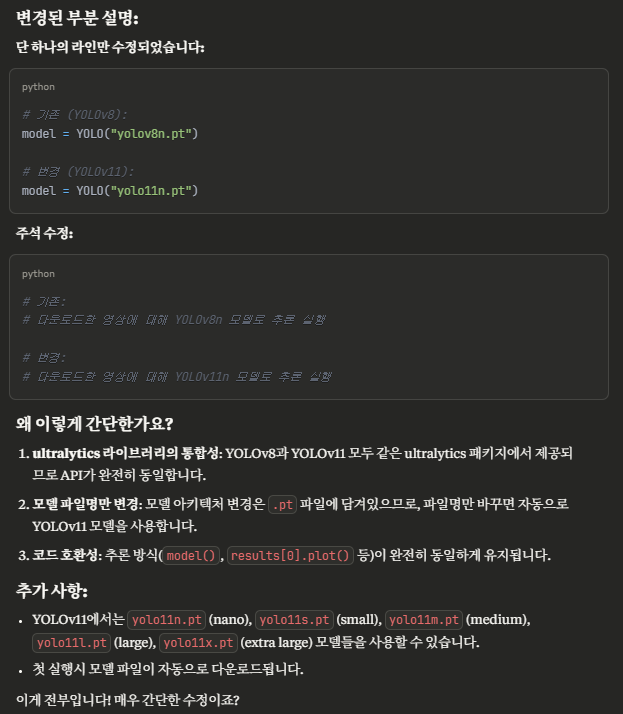

In [ ]:
!pip install yt-dlp ultralytics opencv-python

from google.colab import files
from ultralytics import YOLO
import yt_dlp
import os
import cv2
from IPython.display import Video, display
model = YOLO("yolo11n.pt")
model.info()
results = model.train(data="coco8.yaml", epochs=10, imgsz=640)

# 유튜브 영상 다운로드 함수
def download_youtube_video(url):
    """유튜브 영상을 다운로드하는 함수"""
    output_path = "./downloads"
    os.makedirs(output_path, exist_ok=True)

    ydl_opts = {
        'format': 'best[height<=720]',  # 720p 이하 최고 화질
        'outtmpl': os.path.join(output_path, '%(title)s.%(ext)s'),
    }

    try:
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            info = ydl.extract_info(url, download=False)
            title = info.get('title', 'video')

            # 영상 다운로드
            ydl.download([url])

            # 다운로드된 파일 경로 찾기
            for file in os.listdir(output_path):
                if file.endswith(('.mp4', '.mkv', '.webm')):
                    video_path = os.path.join(output_path, file)
                    print(f"다운로드 완료: {video_path}")
                    return video_path

    except Exception as e:
        print(f"다운로드 오류: {e}")
        return None

# 영상 처리 함수
def process_video(video_path, output_path="./output_video.mp4"):
    """영상에서 객체 탐지를 수행하는 함수"""
    cap = cv2.VideoCapture(video_path)

    # 영상 속성 가져오기
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    print(f"영상 정보: {width}x{height}, FPS: {fps}, 총 프레임: {total_frames}")

    # 비디오 작성기 설정
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    frame_count = 0

    # 프레임별 처리
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # YOLO 객체 탐지 (기존 코드와 동일한 방식)
        results = model(frame)

        # 탐지 결과를 프레임에 그리기
        annotated_frame = results[0].plot()

        # 프레임 저장
        out.write(annotated_frame)

        # 진행률 표시
        if frame_count % 30 == 0:
            progress = (frame_count / total_frames) * 100
            print(f"처리 진행률: {progress:.1f}%")

        frame_count += 1

    # 자원 해제
    cap.release()
    out.release()
    cv2.destroyAllWindows()

    return output_path

# 방법 1: 유튜브 URL 직접 입력
youtube_url = input("유튜브 영상 URL을 입력하세요: ")

if youtube_url:
    # 유튜브 영상 다운로드
    video_path = download_youtube_video(youtube_url)

    if video_path:
        # 다운로드한 영상에 대해 YOLOv11n 모델로 추론 실행
        output_video = process_video(video_path)
    else:
        print("영상 다운로드에 실패했습니다.")

print("\n처리 완료!")

#mAP path

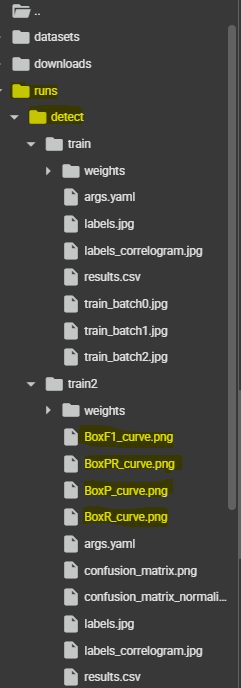

#YOLOv11이 감지할 수 있는 객체
**클래스(Class)**는 머신러닝과 객체 탐지에서 "카테고리" 또는 **"분류"**

클래스의 의미:

분류 기준: 모델이 구분할 수 있는 물체의 종류

라벨: 각 물체에 붙이는 이름표

카테고리: 비슷한 특성을 가진 물체들을 묶은 그룹

감지 가능한 클래스:
0: person
1: bicycle
2: car
3: motorcycle
4: airplane
5: bus
6: train
7: truck
8: boat
9: traffic light
10: fire hydrant
11: stop sign
12: parking meter
13: bench
14: bird
15: cat
16: dog
17: horse
18: sheep
19: cow
20: elephant
21: bear
22: zebra
23: giraffe
24: backpack
25: umbrella
26: handbag
27: tie
28: suitcase
29: frisbee
30: skis
31: snowboard
32: sports ball
33: kite
34: baseball bat
35: baseball glove
36: skateboard
37: surfboard
38: tennis racket
39: bottle
40: wine glass
41: cup
42: fork
43: knife
44: spoon
45: bowl
46: banana
47: apple
48: sandwich
49: orange
50: broccoli
51: carrot
52: hot dog
53: pizza
54: donut
55: cake
56: chair
57: couch
58: potted plant
59: bed
60: dining table
61: toilet
62: tv
63: laptop
64: mouse
65: remote
66: keyboard
67: cell phone
68: microwave
69: oven
70: toaster
71: sink
72: refrigerator
73: book
74: clock
75: vase
76: scissors
77: teddy bear
78: hair drier
79: toothbrush


In [ ]:
!pip install yt-dlp ultralytics opencv-python
from ultralytics import YOLO

model = YOLO("yolo11n.pt")
print("감지 가능한 클래스:")
for i, class_name in enumerate(model.names.values()):
    print(f"{i}: {class_name}")

#ultralytic 사이트와 chat gpt를 이용해서 코드 생성하기

In [ ]:
!pip install yt-dlp ultralytics opencv-python
from ultralytics import YOLO

# Load a COCO-pretrained YOLO11n model
model = YOLO("yolo11n.pt")

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="coco8.yaml", epochs=100, imgsz=640)

# Run inference with the YOLO11n model on the 'bus.jpg' image
results = model("path/to/bus.jpg")

In [ ]:
!pip install yt-dlp ultralytics opencv-python
from ultralytics import YOLO

# Load a COCO-pretrained YOLO11n model
model = YOLO("yolo11n.pt")

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="coco8.yaml", epochs=100, imgsz=640)

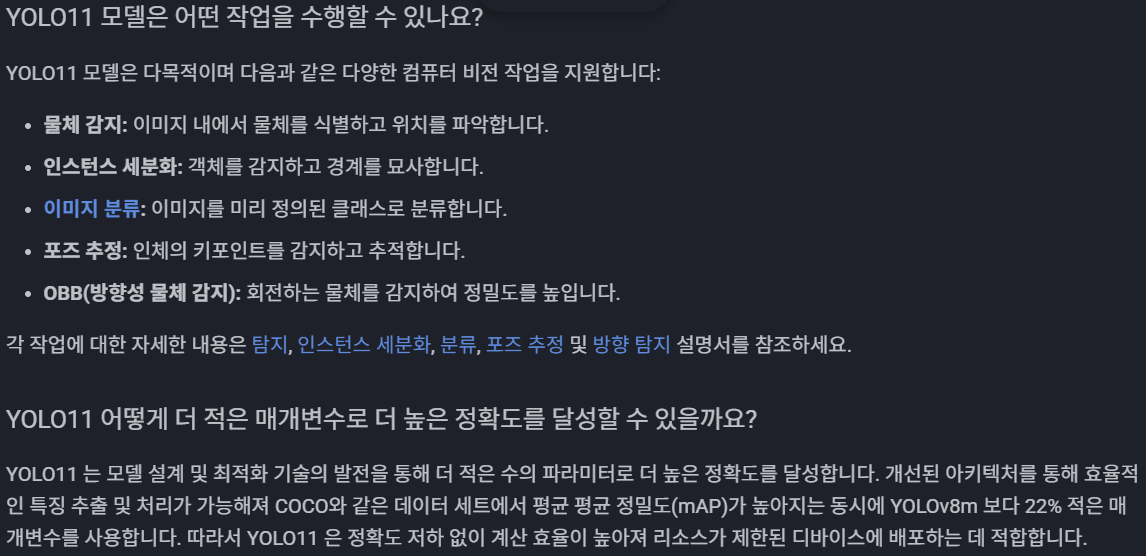